In [2]:
import pandas as pd

# Load the dataset
file_path = 'Superstore.xlsx - Orders.csv'
df = pd.read_csv(file_path)

# Quick overview of the dataset
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9987 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,3/22/2022,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,West,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,11/8/2020,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,West,FUR-CH-10000454,Furniture,Fasteners,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,6/12/2020,6/16/2020,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Fasteners,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,10/11/2019,10/18/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,West,FUR-TA-10000577,Furniture,Fasteners,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,10/11/2019,10/18/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,West,OFF-ST-10000760,Office Supplies,Fasteners,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# Summary statistics for numerical columns
df.describe()

# Value counts for categorical columns
df['Category'].value_counts()


,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


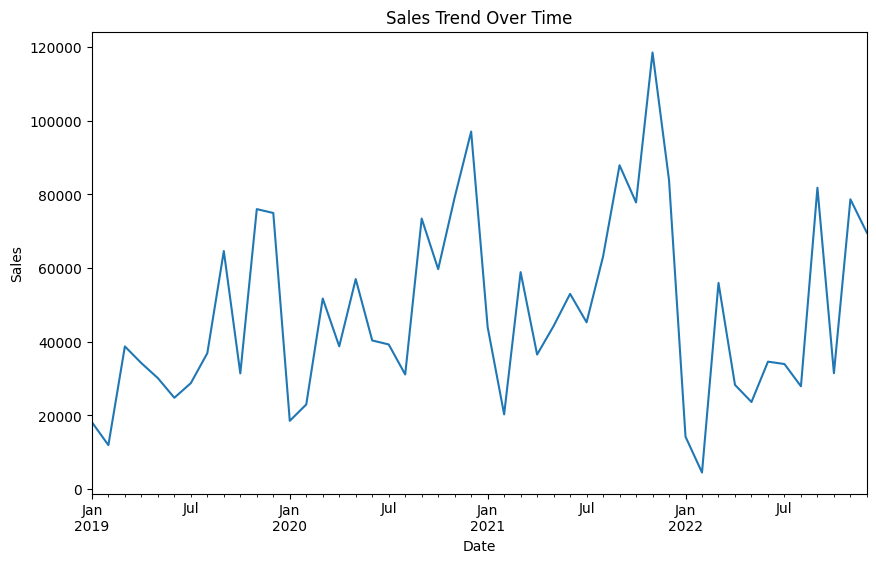

In [6]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by month and year for sales trends
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Plot the sales trend
import matplotlib.pyplot as plt

monthly_sales.plot(kind='line', figsize=(10,6), title='Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [7]:
# Calculate total sales per customer
clv = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
clv.head(10)


,Sales
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571
Ken Lonsdale,14175.229
Sanjit Chand,14142.334
Hunter Lopez,12873.298
Sanjit Engle,12209.438


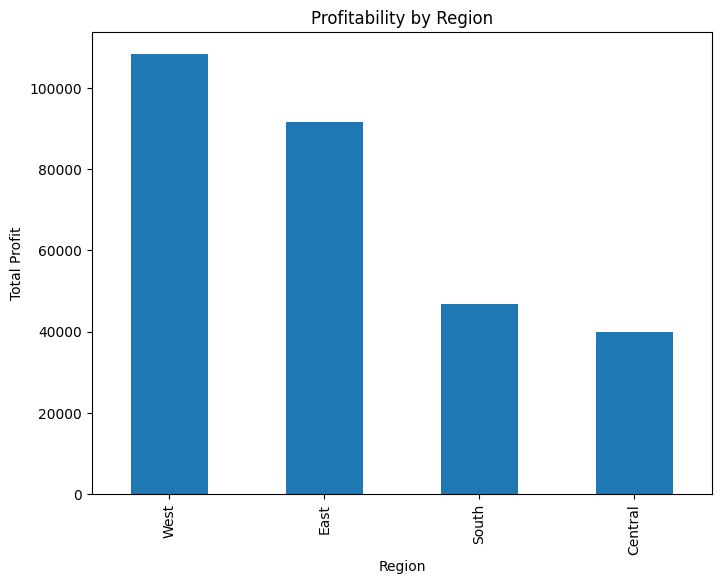

In [8]:
# Calculate total profit by region
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

# Plot regional profitability
region_profit.plot(kind='bar', figsize=(8,6), title='Profitability by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()


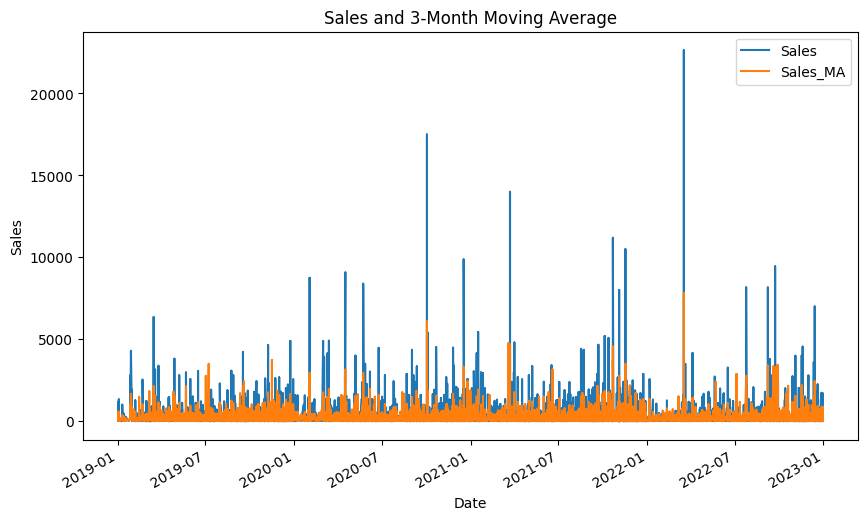

In [9]:
# Calculate moving average for sales (3 months window)
df.set_index('Order Date', inplace=True)
df['Sales_MA'] = df['Sales'].rolling(window=3).mean()

# Plot sales and moving average
df[['Sales', 'Sales_MA']].plot(figsize=(10,6), title='Sales and 3-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [ ]:
# First, convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by the month and year, then calculate total sales
monthly_sales_trend = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index().sort_values(by='Order Date')
print(monthly_sales_trend)


   Order Date        Sales
0     2019-01   18174.0756
1     2019-02   11951.4110
2     2019-03   38726.2520
3     2019-04   34195.2085
4     2019-05   30131.6865
5     2019-06   24797.2920
6     2019-07   28765.3250
7     2019-08   36898.3322
8     2019-09   64595.9180
9     2019-10   31404.9235
10    2019-11   75972.5635
11    2019-12   74919.5212
12    2020-01   18542.4910
13    2020-02   22978.8150
14    2020-03   51715.8750
15    2020-04   38750.0390
16    2020-05   56987.7280
17    2020-06   40344.5340
18    2020-07   39261.9630
19    2020-08   31115.3743
20    2020-09   73410.0249
21    2020-10   59687.7450
22    2020-11   79150.0058
23    2020-12   96999.0430
24    2021-01   43971.3740
25    2021-02   20301.1334
26    2021-03   58872.3528
27    2021-04   36521.5361
28    2021-05   44261.1102
29    2021-06   52981.7257
30    2021-07   45264.4160
31    2021-08   63120.8880
32    2021-09   87866.6520
33    2021-10   77776.9232
34    2021-11  118447.8250
35    2021-12   83829.3188
3

In [ ]:
# Group by Customer ID and calculate total sales (CLTV)
cltv = df.groupby(['Customer ID', 'Customer Name'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
print(cltv.head())


    Customer ID  Customer Name      Sales
700    SM-20320    Sean Miller  25043.050
741    TC-20980   Tamara Chand  19052.218
621    RB-19360   Raymond Buch  15117.339
730    TA-21385   Tom Ashbrook  14595.620
6      AB-10105  Adrian Barton  14473.571


In [ ]:
# Create a profit margin column
df['Profit Margin'] = df['Profit'] / df['Sales']

# Group by Product Name and find the top 5 with the highest profit margin
top_profit_margin_products = df.groupby('Product Name')['Profit Margin'].mean().reset_index().sort_values(by='Profit Margin', ascending=False).head(5)
print(top_profit_margin_products)


                                           Product Name  Profit Margin
1566             Tops Green Bar Computer Printout Paper            0.5
405   Canon imageCLASS MF7460 Monochrome Digital Las...            0.5
1473                   Southworth Structures Collection            0.5
109   Adams Telephone Message Book w/Frequently-Call...            0.5
1672                                         Xerox 1890            0.5


In [ ]:
# Create a profit margin column
df['Profit Margin'] = df['Profit'] / df['Sales']

# Group by Product Name and find the top 5 with the highest profit margin
top_profit_margin_products = df.groupby('Product Name')['Profit Margin'].mean().reset_index().sort_values(by='Profit Margin', ascending=False).head(5)
print(top_profit_margin_products)


                                           Product Name  Profit Margin
1566             Tops Green Bar Computer Printout Paper            0.5
405   Canon imageCLASS MF7460 Monochrome Digital Las...            0.5
1473                   Southworth Structures Collection            0.5
109   Adams Telephone Message Book w/Frequently-Call...            0.5
1672                                         Xerox 1890            0.5


In [ ]:
# Count the number of orders per customer
customer_order_count = df.groupby(['Customer ID', 'Customer Name'])['Order ID'].nunique().reset_index().sort_values(by='Order ID', ascending=False).head(10)
print(customer_order_count)


    Customer ID        Customer Name  Order ID
275    EP-13915           Emily Phan        17
791    ZC-21910     Zuschuss Carroll        13
147    CK-12205  Chloris Kastensmidt        13
691    SH-19975        Sally Hughsby        13
356    JE-15745           Joel Eaton        13
245    EA-14035        Erin Ashbrook        13
591    PG-18820      Patrick Gardner        13
576    NS-18640         Noel Staavos        13
694    SJ-20125        Sanjit Jacobs        12
257    EH-13765         Edward Hooks        12


In [ ]:
shipping_profit = df.groupby('Ship Mode')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
print(shipping_profit)


        Ship Mode       Profit
3  Standard Class  164088.7875
2    Second Class   57446.6354
0     First Class   48969.8399
1        Same Day   15891.7589


In [10]:
# Total sales and profit per product category
category_sales_profit = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values(by='Sales', ascending=False)

print(category_sales_profit)


                       Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008


In [11]:
# Top 10 customers by total sales
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

print(top_customers)


Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


In [12]:
# Top 10 products by total profit
top_products_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

print(top_products_profit)


Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Thermal Label Printer                                               3343.5360
Name: Profit, dtype: float64


In [13]:
# Sales and profit by ship mode
ship_mode_analysis = df.groupby('Ship Mode').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values(by='Sales', ascending=False)

print(ship_mode_analysis)


                       Sales       Profit
Ship Mode                                
Standard Class  1.358216e+06  164088.7875
Second Class    4.591936e+05   57446.6354
First Class     3.514284e+05   48969.8399
Same Day        1.283631e+05   15891.7589


In [14]:
# Sales by region
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

print(sales_by_region)


Region
West       728012.4500
East       678694.1400
Central    501073.1008
South      389421.1695
Name: Sales, dtype: float64


In [18]:
# Step 1: Install required libraries
!pip install pandas sqlite3

# Step 2: Import libraries
import pandas as pd
import sqlite3

# Step 3: Create a SQLite database connection
conn = sqlite3.connect(':memory:')  # In-memory database

# Step 4: Load your dataset (adjust the path as needed)
df = pd.read_csv('/content/Superstore.xlsx - Orders.csv')

# Step 5: Write DataFrame to SQL
df.to_sql('orders', conn, index=False, if_exists='replace')

# Execute a SQL query
query = """SELECT
    Category,
    SUM(Sales) AS total_sales
FROM
    orders
GROUP BY
    Category
ORDER BY
    total_sales DESC"""  # Replace with your actual SQL query
result = pd.read_sql(query, conn)

# Display the result
print(result)


ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3
          Category  total_sales
0       Technology  836154.0330
1        Furniture  741999.7953
2  Office Supplies  719047.0320


In [19]:
query = """
SELECT
    Region,
    AVG(Discount) AS average_discount
FROM
    orders
GROUP BY
    Region
ORDER BY
    average_discount DESC
"""
result = pd.read_sql(query, conn)
print(result)


    Region  average_discount
0  Central          0.240215
1    South          0.147333
2     East          0.145467
3     West          0.109502


In [31]:
query = """SELECT
    City,
    AVG(Discount) AS average_discount
FROM
    orders
GROUP BY
    City
ORDER BY
    average_discount DESC
LIMIT 10;"""
result = pd.read_sql(query, conn)
print(result)

            City  average_discount
0     Romeoville          0.800000
1  Missouri City          0.800000
2      Deer Park          0.800000
3        Abilene          0.800000
4      Pensacola          0.700000
5   Ormond Beach          0.700000
6      Littleton          0.700000
7         Elyria          0.700000
8          Tyler          0.640000
9          Bryan          0.616667


In [32]:
query = """SELECT
    City,
    SUM(Sales) AS total_sales
FROM
    orders
GROUP BY
    City
ORDER BY
    total_sales DESC
LIMIT 5;
"""
result = pd.read_sql(query, conn)
print(result)

            City  total_sales
0  New York City   256368.161
1    Los Angeles   175851.341
2        Seattle   119540.742
3  San Francisco   112669.092
4   Philadelphia   109077.013


In [34]:
query = """SELECT
    Discount,
    SUM(Sales) AS total_sales
FROM
    orders
GROUP BY
    Discount
ORDER BY
    Discount DESC;

"""
result = pd.read_sql(query, conn)
print(result)

    Discount   total_sales
0       0.80  1.696376e+04
1       0.70  4.062028e+04
2       0.60  6.644700e+03
3       0.50  5.891854e+04
4       0.45  5.484974e+03
5       0.40  1.164178e+05
6       0.32  1.449346e+04
7       0.30  1.032267e+05
8       0.20  7.645944e+05
9       0.15  2.755852e+04
10      0.10  5.436935e+04
11      0.00  1.087908e+06
